# Tweets about Covid-19 vaccines

In [1]:
# Import packages
import nltk
from pprint import pprint
import yaml
import sys
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import neattext as ntx
from wordcloud import WordCloud

## Part 1: EDA on during1_covidTweets

In [2]:
data = pd.read_csv('during1_covidTweets.csv')
data.head()

,datetime,tweet_id,text,username,url,user_location,like_count,retweet_count,follower_count,reply_count,verified,hashtags
0,2021-02-27 23:59:08+00:00,1365813750192775168,US Authorizes Johnson &amp; Johnson Covid Vacc...,AndyVermaut,https://twitter.com/AndyVermaut/status/1365813...,"Diksmuide, België",0,0,31263,0,False,NaN
1,2021-02-27 23:58:41+00:00,1365813639337435142,U.S. authorizes Johnson &amp; Johnson’s COVID-...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN
2,2021-02-27 23:56:42+00:00,1365813136922583041,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN
3,2021-02-27 23:56:16+00:00,1365813027648335872,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN
4,2021-02-27 23:56:15+00:00,1365813025450647556,2 new deaths in Mayotte \n\n[23:56 GMT] #coron...,COVIDLive,https://twitter.com/COVIDLive/status/136581302...,NaN,1,0,1495,0,False,"['coronavirus', 'CoronaVirusUpdate', 'COVID19'..."


In [3]:
data.shape

(149172, 12)

In [4]:
data.isnull().sum()

datetime               0
tweet_id               0
text                   0
username               0
url                    0
user_location      29266
like_count             0
retweet_count          0
follower_count         0
reply_count            0
verified               0
hashtags          120341
dtype: int64

### Simple visualisation (E.g Visualizing Tweet count vs Location)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'http://www.zyite.com/'),
  Text(1, 0, 'California'),
  Text(2, 0, 'New York, NY'),
  Text(3, 0, 'Greater Portland, Oregon, USA'),
  Text(4, 0, 'Washington, DC'),
  Text(5, 0, 'Around the world'),
  Text(6, 0, 'New Delhi, India'),
  Text(7, 0, 'Los Angeles, CA'),
  Text(8, 0, 'Tanzania'),
  Text(9, 0, 'United States'),
  Text(10, 0, 'WORLDWIDE'),
  Text(11, 0, 'Philadelphia PA, USA'),
  Text(12, 0, 'USA'),
  Text(13, 0, 'New York City'),
  Text(14, 0, 'Anchorage, Alaska'),
  Text(15, 0, 'Dublin'),
  Text(16, 0, 'Erie, PA'),
  Text(17, 0, 'United Kingdom 🇬🇧'),
  Text(18, 0, 'Michigan, USA'),
  Text(19, 0, 'Morgantown, WV')])

C:\Users\LeeShaoMing\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LeeShaoMing\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


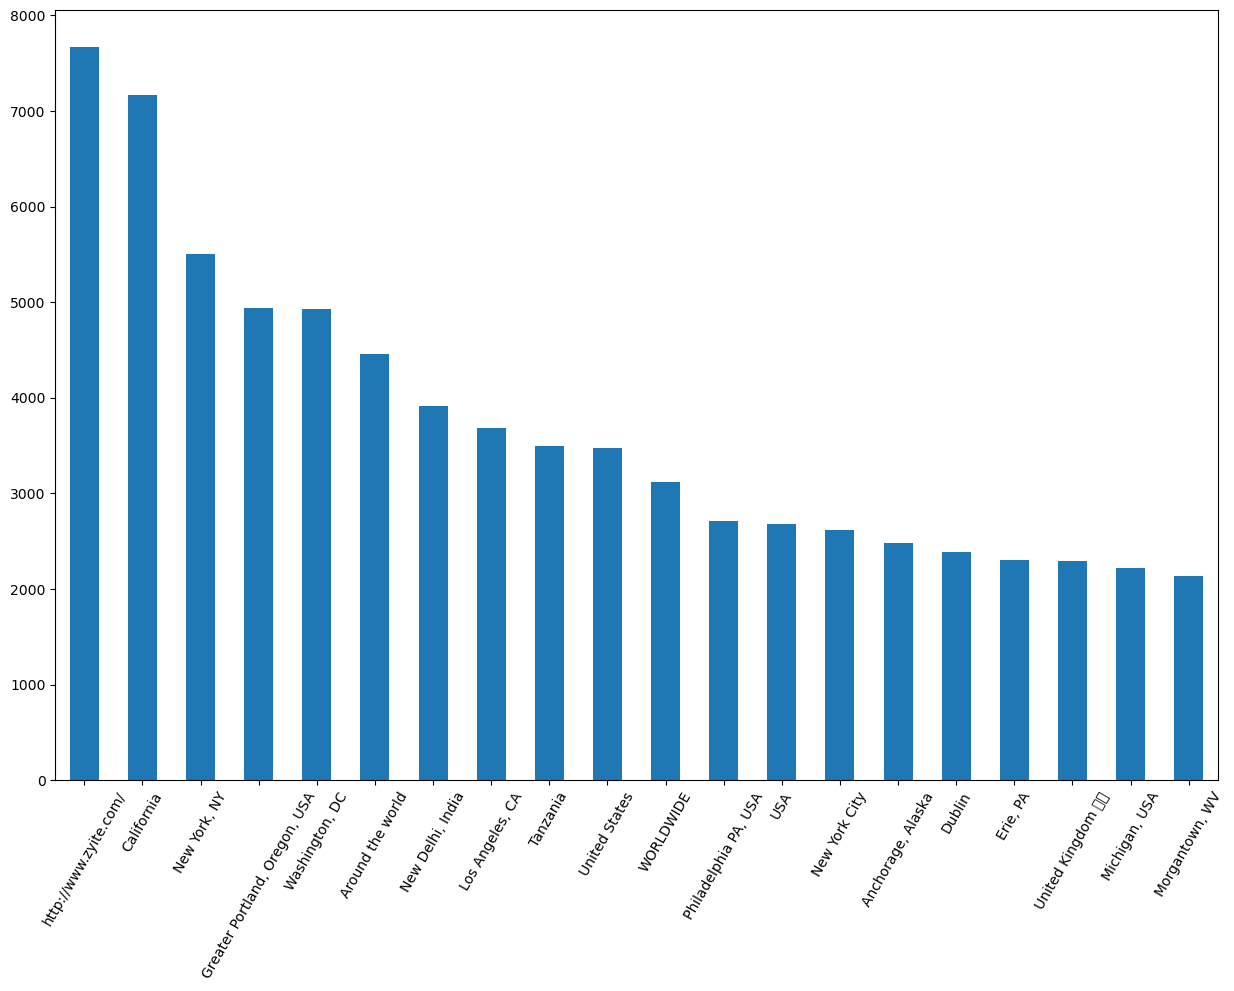

In [5]:
plt.figure(figsize=(15,10))
data['user_location'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=60)

### Word cloud in general (What do ppl talk about - Most frequent words or top keywords) 

(-0.5, 999.5, 499.5, -0.5)

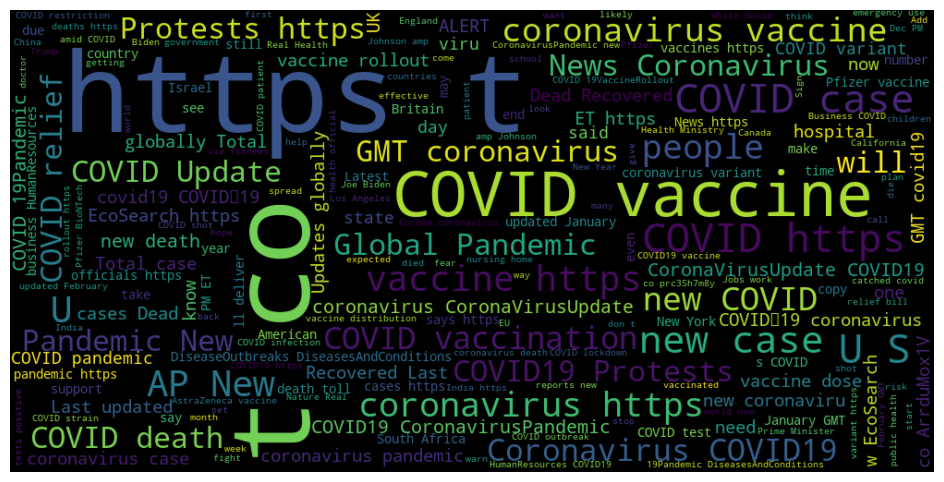

In [6]:
words = ' '.join([word for word in data['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

### Check for duplicate tweets based on the tweet content

In [7]:
duplicate_tweets = data[data.duplicated(['text'])]
print('Number of duplicate tweets:', len(duplicate_tweets))

Number of duplicate tweets: 1877


### Drop duplicate tweets

In [8]:
data = data.drop_duplicates('text')
data.shape

(147295, 12)

### <font color=#FF0000>**Sentiment Analysis (using Textblob)**</font> <br>
**Polarity:** 1 means positive statement, -1 means a negative statement and 0 means neutral.
<br>
**Subjectivity:** Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is a float which lies in the range of [0,1].

### Clean the data using neattext library

In [9]:
data['clean_data'] = data['text'].apply(ntx.remove_hashtags)
data['clean_data'] = data['clean_data'].apply(ntx.remove_urls)
data['clean_data'] = data['clean_data'].apply(ntx.remove_userhandles)
data['clean_data'] = data['clean_data'].apply(ntx.remove_multiple_spaces)
data['clean_data'] = data['clean_data'].apply(ntx.remove_special_characters)

In [10]:
data['clean_data']

0         US Authorizes Johnson amp Johnson Covid Vaccin...
1         US authorizes Johnson amp Johnsons COVID19 vac...
2         FDA Authorizes Johnson amp Johnson Covid19Vacc...
3         FDA Authorizes Johnson amp Johnson Covid19Vacc...
4                         2 new deaths in Mayotte 2356 GMT 
                                ...                        
149167     It was so strict they allowed tens of thousan...
149168                                  Because its COVID19
149169    US reports over 10000 coronavirus deaths last ...
149170     raises difficult issues about limits of tests...
149171    Fauci says US could see a surge upon a surge i...
Name: clean_data, Length: 147295, dtype: object

In [11]:
data.shape

(147295, 13)

### Using stopwords to remove words that are generally considered to be of little value 

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [13]:
stop_words = stopwords.words('english')   
len(stop_words)

179

In [14]:
def stopWords(tweet):
    clean_tweet = tweet
    clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
    return clean_tweet

In [15]:
data['clean_data'] = data['clean_data'].apply(lambda x: stopWords(x))

In [16]:
data.head()

,datetime,tweet_id,text,username,url,user_location,like_count,retweet_count,follower_count,reply_count,verified,hashtags,clean_data
0,2021-02-27 23:59:08+00:00,1365813750192775168,US Authorizes Johnson &amp; Johnson Covid Vacc...,AndyVermaut,https://twitter.com/AndyVermaut/status/1365813...,"Diksmuide, België",0,0,31263,0,False,NaN,US Authorizes Johnson amp Johnson Covid Vaccin...
1,2021-02-27 23:58:41+00:00,1365813639337435142,U.S. authorizes Johnson &amp; Johnson’s COVID-...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,US authorizes Johnson amp Johnsons COVID19 vac...
2,2021-02-27 23:56:42+00:00,1365813136922583041,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,FDA Authorizes Johnson amp Johnson Covid19Vaccine
3,2021-02-27 23:56:16+00:00,1365813027648335872,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,FDA Authorizes Johnson amp Johnson Covid19Vaccine
4,2021-02-27 23:56:15+00:00,1365813025450647556,2 new deaths in Mayotte \n\n[23:56 GMT] #coron...,COVIDLive,https://twitter.com/COVIDLive/status/136581302...,NaN,1,0,1495,0,False,"['coronavirus', 'CoronaVirusUpdate', 'COVID19'...",2 new deaths Mayotte 2356 GMT


### Assigning Polarity and Subjectivity to the Tweets using Textblob

In [17]:
from textblob import TextBlob

# Function to assign polarity and subjectivity to the tweets
def blob_fun(text):
    senti = TextBlob(text)
    senti_polarity = senti.sentiment.polarity
    senti_subjectivity = senti.sentiment.subjectivity
    
    if senti_polarity > 0:
        res = 'Positive'
    elif senti_polarity < 0:
        res = 'Negative'
    elif senti_polarity == 0:
        res ="Neutral"
        
    result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}
    
    return result

In [18]:
data['results'] = data['clean_data'].apply(lambda x: blob_fun(x))

In [19]:
data.head()

,datetime,tweet_id,text,username,url,user_location,like_count,retweet_count,follower_count,reply_count,verified,hashtags,clean_data,results
0,2021-02-27 23:59:08+00:00,1365813750192775168,US Authorizes Johnson &amp; Johnson Covid Vacc...,AndyVermaut,https://twitter.com/AndyVermaut/status/1365813...,"Diksmuide, België",0,0,31263,0,False,NaN,US Authorizes Johnson amp Johnson Covid Vaccin...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
1,2021-02-27 23:58:41+00:00,1365813639337435142,U.S. authorizes Johnson &amp; Johnson’s COVID-...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,US authorizes Johnson amp Johnsons COVID19 vac...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
2,2021-02-27 23:56:42+00:00,1365813136922583041,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,FDA Authorizes Johnson amp Johnson Covid19Vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
3,2021-02-27 23:56:16+00:00,1365813027648335872,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,FDA Authorizes Johnson amp Johnson Covid19Vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
4,2021-02-27 23:56:15+00:00,1365813025450647556,2 new deaths in Mayotte \n\n[23:56 GMT] #coron...,COVIDLive,https://twitter.com/COVIDLive/status/136581302...,NaN,1,0,1495,0,False,"['coronavirus', 'CoronaVirusUpdate', 'COVID19'...",2 new deaths Mayotte 2356 GMT,"{'polarity': 0.13636363636363635, 'subjectivit..."


In [20]:
data.shape

(147295, 14)

In [21]:
data = data.join(pd.json_normalize(data = data['results']))

In [22]:
data.head()

,datetime,tweet_id,text,username,url,user_location,like_count,retweet_count,follower_count,reply_count,verified,hashtags,clean_data,results,polarity,subjectivity,sentiment
0,2021-02-27 23:59:08+00:00,1365813750192775168,US Authorizes Johnson &amp; Johnson Covid Vacc...,AndyVermaut,https://twitter.com/AndyVermaut/status/1365813...,"Diksmuide, België",0,0,31263,0,False,NaN,US Authorizes Johnson amp Johnson Covid Vaccin...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
1,2021-02-27 23:58:41+00:00,1365813639337435142,U.S. authorizes Johnson &amp; Johnson’s COVID-...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,US authorizes Johnson amp Johnsons COVID19 vac...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
2,2021-02-27 23:56:42+00:00,1365813136922583041,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,FDA Authorizes Johnson amp Johnson Covid19Vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
3,2021-02-27 23:56:16+00:00,1365813027648335872,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,FDA Authorizes Johnson amp Johnson Covid19Vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
4,2021-02-27 23:56:15+00:00,1365813025450647556,2 new deaths in Mayotte \n\n[23:56 GMT] #coron...,COVIDLive,https://twitter.com/COVIDLive/status/136581302...,NaN,1,0,1495,0,False,"['coronavirus', 'CoronaVirusUpdate', 'COVID19'...",2 new deaths Mayotte 2356 GMT,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive


In [23]:
data.rename(columns={'sentiment': 'Textblob'}, inplace=True)

In [24]:
data.head()

,datetime,tweet_id,text,username,url,user_location,like_count,retweet_count,follower_count,reply_count,verified,hashtags,clean_data,results,polarity,subjectivity,Textblob
0,2021-02-27 23:59:08+00:00,1365813750192775168,US Authorizes Johnson &amp; Johnson Covid Vacc...,AndyVermaut,https://twitter.com/AndyVermaut/status/1365813...,"Diksmuide, België",0,0,31263,0,False,NaN,US Authorizes Johnson amp Johnson Covid Vaccin...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
1,2021-02-27 23:58:41+00:00,1365813639337435142,U.S. authorizes Johnson &amp; Johnson’s COVID-...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,US authorizes Johnson amp Johnsons COVID19 vac...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
2,2021-02-27 23:56:42+00:00,1365813136922583041,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,FDA Authorizes Johnson amp Johnson Covid19Vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
3,2021-02-27 23:56:16+00:00,1365813027648335872,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,FDA Authorizes Johnson amp Johnson Covid19Vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
4,2021-02-27 23:56:15+00:00,1365813025450647556,2 new deaths in Mayotte \n\n[23:56 GMT] #coron...,COVIDLive,https://twitter.com/COVIDLive/status/136581302...,NaN,1,0,1495,0,False,"['coronavirus', 'CoronaVirusUpdate', 'COVID19'...",2 new deaths Mayotte 2356 GMT,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive


### Visualize Positive, Negative & Neutral sentiments (wordcloud, bar chart & sentiments of positive, negative, and neutral based on different countries.

In [25]:
# categorized tweets in seperate Series
positive_tweet =  data[data['Textblob'] == 'Positive']['clean_data']
negative_tweet =  data[data['Textblob'] == 'Negative']['clean_data']
neutral_tweet = data[data['Textblob'] == 'Neutral']['clean_data']

In [26]:
def percent(x,y):
    return print("Percentage of "+ y +" tweets :",round(len(x)/data.shape[0]*100,3),"%")

In [27]:
percent(positive_tweet, 'positive')
percent(negative_tweet, 'negative')
percent(neutral_tweet, 'neutral')

Percentage of positive tweets : 38.612 %
Percentage of negative tweets : 17.09 %
Percentage of neutral tweets : 43.049 %


In [28]:
# Function for creating WordClouds
def cloud_of_Words(tweets,title):
    forcloud = ' '.join([tweet for tweet in tweets])
    wordcloud = WordCloud(width =500,height = 300,random_state =5,max_font_size=110).generate(forcloud)
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.figure(figsize = (10,8))

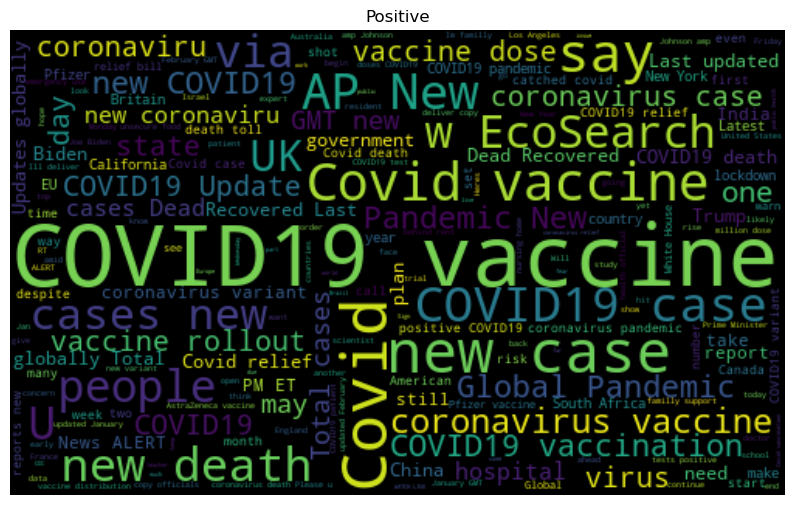

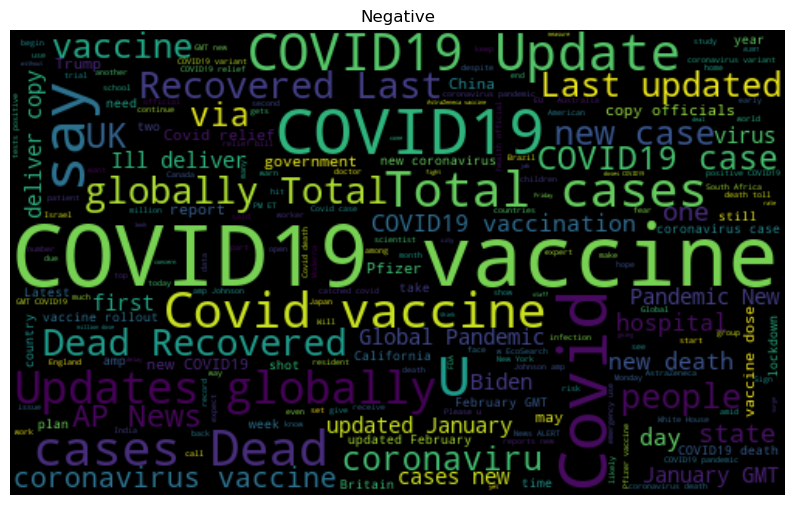

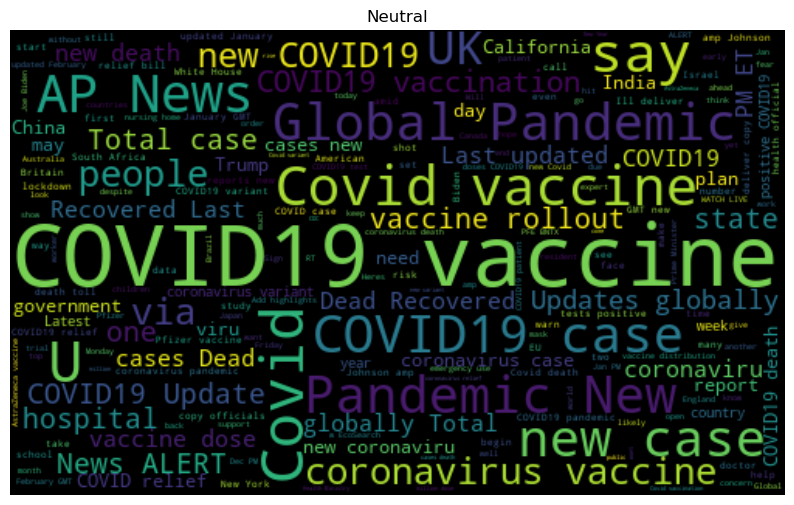

<Figure size 1000x800 with 0 Axes>

In [29]:
plt.figure(figsize = (10,8))
# Creating wordclouds for positive, negative, neutral tweets
cloud_of_Words(positive_tweet, 'Positive')
cloud_of_Words(negative_tweet, 'Negative')
cloud_of_Words(neutral_tweet, 'Neutral')

56874
63409
25173


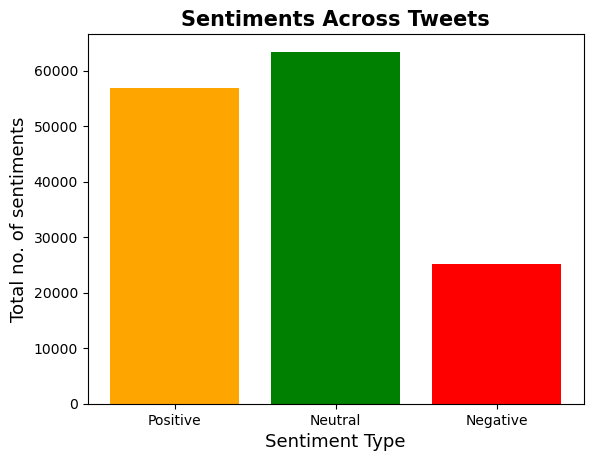

In [30]:
plt.title('Sentiments Across Tweets',fontsize = 15, fontweight = 'bold')

pos_total = data[data['Textblob'] == 'Positive']['Textblob'].count()
neu_total = data[data['Textblob'] == 'Neutral']['Textblob'].count()
neg_total = data[data['Textblob'] == 'Negative']['Textblob'].count()
print(pos_total)
print(neu_total)
print(neg_total)

sentiment_type = ['Positive','Neutral','Negative']
sentiment_total = [pos_total, neu_total, neg_total]

plt.bar(sentiment_type, sentiment_total, color = ['orange', 'green', 'red'])
plt.ylabel('Total no. of sentiments',fontsize=13)
plt.xlabel('Sentiment Type',fontsize=13)
plt.show()

### <font color=#FF0000>**Sentiment Analysis (Using Sentiment Intensity Analyzer)**</font> <br>

A class in the nltk (Natural Language Toolkit) library of Python that is used for sentiment analysis of text data. Specifically, it is a rule-based sentiment analysis tool that uses a lexicon of words and their associated sentiment scores to compute the overall sentiment of a piece of text.

The SentimentIntensityAnalyzer() class has a polarity_scores() method that takes a string of text as input and returns a dictionary containing the sentiment scores for that text. 

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = data.text.apply(ps)
sentiment_scores

0         {'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'comp...
1         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                                ...                        
149167    {'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'comp...
149168    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
149169    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
149170    {'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'comp...
149171    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: text, Length: 147295, dtype: object

In [33]:
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.191,0.809,0.0,-0.3818
1,0.000,1.000,0.0,0.0000
2,0.000,1.000,0.0,0.0000
3,0.000,1.000,0.0,0.0000
4,0.000,1.000,0.0,0.0000


We can see that there is neg for negative sentiment, neu for neutral sentiment, pos for positive sentiment, and compound as the average rate of the sentiment. We will focused on the compound.

For negative sentiment, the compound score will be closer to -1, and the opposite goes for the positive sentiment, which will be closer to 1. Neutral sentiment will be a 0.

For our analysis, we will create another column called label, where we will be labelling the scores based on the compound polarity value

In [34]:
labelize = lambda x : 'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['Vader'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,Vader
0,0.191,0.809,0.0,-0.3818,negative
1,0.000,1.000,0.0,0.0000,neutral
2,0.000,1.000,0.0,0.0000,neutral
3,0.000,1.000,0.0,0.0000,neutral
4,0.000,1.000,0.0,0.0000,neutral


In [35]:
filtered_label = data.join(sentiment_df.Vader)
filtered_label.head()

,datetime,tweet_id,text,username,url,user_location,like_count,retweet_count,follower_count,reply_count,verified,hashtags,clean_data,results,polarity,subjectivity,Textblob,Vader
0,2021-02-27 23:59:08+00:00,1365813750192775168,US Authorizes Johnson &amp; Johnson Covid Vacc...,AndyVermaut,https://twitter.com/AndyVermaut/status/1365813...,"Diksmuide, België",0,0,31263,0,False,NaN,US Authorizes Johnson amp Johnson Covid Vaccin...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral,negative
1,2021-02-27 23:58:41+00:00,1365813639337435142,U.S. authorizes Johnson &amp; Johnson’s COVID-...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,US authorizes Johnson amp Johnsons COVID19 vac...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral,neutral
2,2021-02-27 23:56:42+00:00,1365813136922583041,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,FDA Authorizes Johnson amp Johnson Covid19Vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral,neutral
3,2021-02-27 23:56:16+00:00,1365813027648335872,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,FDA Authorizes Johnson amp Johnson Covid19Vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral,neutral
4,2021-02-27 23:56:15+00:00,1365813025450647556,2 new deaths in Mayotte \n\n[23:56 GMT] #coron...,COVIDLive,https://twitter.com/COVIDLive/status/136581302...,NaN,1,0,1495,0,False,"['coronavirus', 'CoronaVirusUpdate', 'COVID19'...",2 new deaths Mayotte 2356 GMT,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive,neutral


In [36]:
counts_label = pd.DataFrame(filtered_label.Vader.value_counts().reset_index())
counts_label

,index,Vader
0,neutral,53515
1,negative,46574
2,positive,45367


<AxesSubplot:xlabel='index', ylabel='Vader'>

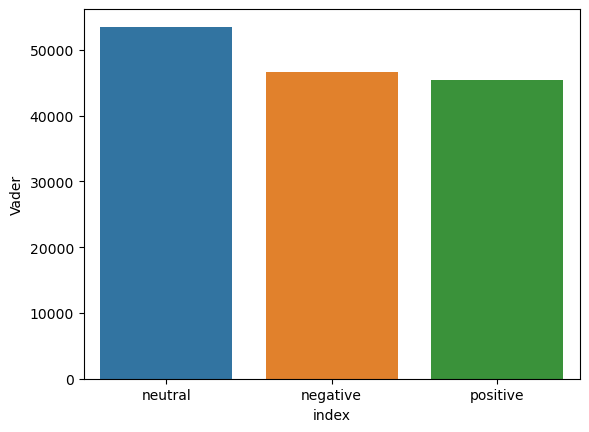

In [37]:
import seaborn as sns
sns.barplot(data=counts_label, x='index', y='Vader')

In [38]:
filtered_label['datetime'] = pd.to_datetime(filtered_label.datetime).dt.date
filtered_label['datetime']

0         2021-02-27
1         2021-02-27
2         2021-02-27
3         2021-02-27
4         2021-02-27
             ...    
149167    2020-12-01
149168    2020-12-01
149169    2020-12-01
149170    2020-12-01
149171    2020-12-01
Name: datetime, Length: 147295, dtype: object

In [39]:
filtered_label.head()

,datetime,tweet_id,text,username,url,user_location,like_count,retweet_count,follower_count,reply_count,verified,hashtags,clean_data,results,polarity,subjectivity,Textblob,Vader
0,2021-02-27,1365813750192775168,US Authorizes Johnson &amp; Johnson Covid Vacc...,AndyVermaut,https://twitter.com/AndyVermaut/status/1365813...,"Diksmuide, België",0,0,31263,0,False,NaN,US Authorizes Johnson amp Johnson Covid Vaccin...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral,negative
1,2021-02-27,1365813639337435142,U.S. authorizes Johnson &amp; Johnson’s COVID-...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,US authorizes Johnson amp Johnsons COVID19 vac...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral,neutral
2,2021-02-27,1365813136922583041,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,FDA Authorizes Johnson amp Johnson Covid19Vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral,neutral
3,2021-02-27,1365813027648335872,FDA Authorizes Johnson &amp; Johnson Covid-19 ...,TrendzNewsbd,https://twitter.com/TrendzNewsbd/status/136581...,"Dhaka,Bangladesh",0,0,52,0,False,NaN,FDA Authorizes Johnson amp Johnson Covid19Vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral,neutral
4,2021-02-27,1365813025450647556,2 new deaths in Mayotte \n\n[23:56 GMT] #coron...,COVIDLive,https://twitter.com/COVIDLive/status/136581302...,NaN,1,0,1495,0,False,"['coronavirus', 'CoronaVirusUpdate', 'COVID19'...",2 new deaths Mayotte 2356 GMT,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive,neutral


In [42]:
data_vader = filtered_label[['username', 'datetime', 'Vader']].groupby(['datetime', 'Vader']).count().reset_index()
data_vader.columns = ['date', 'Vader', 'counts']
data_vader.head()

,date,Vader,counts
0,2020-12-01,negative,247
1,2020-12-01,neutral,278
2,2020-12-01,positive,203
3,2020-12-02,negative,280
4,2020-12-02,neutral,282


In [46]:
px.line(data_vader, x='date', y='counts', color='Vader', title='COVID-19 Vaccines Sentiment Analysis (Vader)')

In [44]:
data_Textblob = filtered_label[['username', 'datetime', 'Textblob']].groupby(['datetime', 'Textblob']).count().reset_index()
data_Textblob.columns = ['date', 'Textblob', 'counts']
data_Textblob.head()

,date,Textblob,counts
0,2020-12-01,Negative,105
1,2020-12-01,Neutral,367
2,2020-12-01,Positive,256
3,2020-12-02,Negative,141
4,2020-12-02,Neutral,359


In [47]:
px.line(data_Textblob, x='date', y='counts', color='Textblob', title='COVID-19 Vaccines Sentiment Analysis (Textblob)')

## Conclusion

### In terms of Twitter tweets, Vader is generally considered to be a more accurate sentiment analysis tool compared to TextBlob. This is because <font color=#FF0000>Twitter data often contains a lot of slang, emoticons, and other forms of figurative language that can be difficult for TextBlob to interpret correctly </font>.

1) Vader, on the other hand, is specifically designed to handle such language and has been trained on a large dataset of social media posts including Twitter data. It uses a more complex rule-based approach that takes into account the context of a word in a sentence to produce a sentiment score, which can be more accurate for Twitter data.

2) TextBlob uses a simple rule-based approach and has been found to perform well on subjective texts like movie reviews, product reviews, and social media posts. It works best when analyzing the overall sentiment of a piece of text.